In [158]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing.imputation import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
# from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os
import random
import matplotlib.pyplot as plt

In [159]:
def makeUserTarget(df, user):
    aux = []
    for _, row in df.iterrows():
        if row.our_data == 0:
            if(np.floor(row.SessionID/100).astype(int) == user):
                aux.append(1)
            else:
                aux.append(0)
        else:
            if 'Diego' in row.SessionID and user == 'Diego':
                aux.append(1)
            elif 'Toto' in row.SessionID and user == 'Toto':
                aux.append(1)
            elif (('Jo' in row.SessionID) or ('jo' in row.SessionID)) and user == 'Jo':
                aux.append(1)
            else:
                aux.append(0)
    df['target'] = aux

In [160]:
def separateIntoTrainAndTest(df, test_sessions = []):
    targetSessionIds = list(df[df.target == 1].SessionID.unique())
    targetChoosenSession = random.choice(targetSessionIds)
    notTargetSessionIds = list(df[df.target == 0].SessionID.unique())
    notTargetChoosenSessions = test_sessions
    for i in range(2):
        notTargetChoosenSession = random.choice(notTargetSessionIds) 
        notTargetChoosenSessions.append(notTargetChoosenSession)
        notTargetSessionIds.remove(notTargetChoosenSession)
    df_train = df[(df.SessionID != targetChoosenSession) & (~df.SessionID.isin(notTargetChoosenSessions))]
    df_test = df[(df.SessionID == targetChoosenSession) | (df.SessionID.isin(notTargetChoosenSessions))]
    
    return df_train, df_test

In [161]:
def getOurDataUsers(row):
    if 'Diego' in row.SessionID :
        return('Diego')
    elif 'Toto' in row.SessionID:
        return('Toto')
    elif ('Jo' in row.SessionID) or ('jo' in row.SessionID):
        return('Jo')

In [162]:
file_name = 'aggregated_features'
our_data_file_name = 'our_data_aggregated_features'
to_drop = []
df = pd.read_csv('./' + file_name + '.csv')
our_data_df = pd.read_csv('./' + our_data_file_name + '.csv')
df['our_data'] = 0
our_data_df['our_data'] = 1

In [163]:
users = (np.floor(df.SessionID/100).astype(int)).unique()
our_data_users = our_data_df.apply(getOurDataUsers,axis=1)

In [164]:
df = df.append(our_data_df,ignore_index=True)

/home/josuzuki/anaconda3/envs/aegis/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [165]:
df = df[df.our_data != 0]

In [166]:
sessionsToDrop = ['Diego01','Diego02','Diego03']

In [167]:
df = df[~df.SessionID.isin(sessionsToDrop)]

In [168]:
#user = random.choice(users)
user = 'Toto'
makeUserTarget(df, user)

In [169]:
#to_drop =  ['our_data','Contact_size_mean','Contact_size_std'] 
to_drop =  ['our_data','Mag_Z_mean','Mag_X_mean','Mag_Y_mean','Mag_Y_std','Mag_Z_std','Mag_X_std']

In [170]:
clf = xgb.XGBClassifier(n_estimators=90, max_depth=9, random_state=31, colsample_bytree=0.6, colsample_bylevel=0.5, learning_rate=0.11, subsample=0.9)
#clf = RandomForestClassifier()

In [171]:
df_train, df_test = separateIntoTrainAndTest(df,test_sessions=['Toto6'])

In [172]:
df_train = df_train.set_index(["SessionID", 'WindowNumber']).drop(to_drop, axis=1)
df_test = df_test.set_index(["SessionID", 'WindowNumber']).drop(to_drop, axis=1)

In [173]:
x_train, y_train = df_train.drop("target", axis=1), df_train["target"]

In [206]:
weird_df = pd.read_csv('weird.csv', )
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=0.6, gamma=0, learning_rate=0.11, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=31, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

In [175]:
x_test, y_test = df_test.drop("target", axis=1), df_test["target"]

In [215]:
x_test

Exception ignored in: <function DMatrix.__del__ at 0x7f231764d510>
Traceback (most recent call last):
  File "/home/josuzuki/anaconda3/envs/aegis/lib/python3.7/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


Acc_X_mean  Acc_X_std  Acc_Y_mean  Acc_Y_std  \
SessionID WindowNumber                                                 
Diego04   0.0                  NaN        NaN         NaN        NaN   
          1.0                  NaN        NaN         NaN        NaN   
          2.0                  NaN        NaN         NaN        NaN   
          3.0                  NaN        NaN         NaN        NaN   
          4.0                  NaN        NaN         NaN        NaN   
          5.0                  NaN        NaN         NaN        NaN   
          6.0                  NaN        NaN         NaN        NaN   
          7.0                  NaN        NaN         NaN        NaN   
          8.0                  NaN        NaN         NaN        NaN   
          9.0                  NaN        NaN         NaN        NaN   
          10.0                 NaN        NaN         NaN        NaN   
          11.0                 NaN        NaN         NaN        NaN   
          12.0                 NaN        NaN         NaN        NaN   
          13.0                 NaN        NaN         NaN        NaN   
          14.0                 NaN        NaN         NaN        NaN   
          15.0                 NaN        NaN         NaN        NaN   
          16.0                 NaN        NaN         NaN        NaN   
          17.0                 NaN        NaN         NaN        NaN   
          18.0                 NaN        NaN         NaN        NaN   
          19.0                 NaN        NaN         NaN        NaN   
          20.0                 NaN        NaN         NaN        NaN   
          21.0                 NaN        NaN         NaN        NaN   
          22.0                 NaN        NaN         NaN        NaN   
          23.0                 NaN        NaN         NaN        NaN   
          24.0                 NaN        NaN         NaN        NaN   
          25.0                 NaN        NaN         NaN        NaN   
          26.0                 NaN        NaN         NaN        NaN   
          27.0                 NaN        NaN         NaN        NaN   
          28.0                 NaN        NaN         NaN        NaN   
          29.0                 NaN        NaN         NaN        NaN   
...                            ...        ...         ...        ...   
Toto8     8.0                  NaN        NaN         NaN        NaN   
          9.0                  NaN        NaN         NaN        NaN   
          10.0                 NaN        NaN         NaN        NaN   
          11.0                 NaN        NaN         NaN        NaN   
          12.0                 NaN        NaN         NaN        NaN   
          13.0                 NaN        NaN         NaN        NaN   
          14.0                 NaN        NaN         NaN        NaN   
          15.0                 NaN        NaN         NaN        NaN   
          16.0                 NaN        NaN         NaN        NaN   
          17.0                 NaN        NaN         NaN        NaN   
          18.0                 NaN        NaN         NaN        NaN   
          19.0                 NaN        NaN         NaN        NaN   
          20.0                 NaN        NaN         NaN        NaN   
          21.0                 NaN        NaN         NaN        NaN   
          22.0                 NaN        NaN         NaN        NaN   
          23.0                 NaN        NaN         NaN        NaN   
          24.0                 NaN        NaN         NaN        NaN   
          25.0                 NaN        NaN         NaN        NaN   
          26.0                 NaN        NaN         NaN        NaN   
          27.0                 NaN        NaN         NaN        NaN   
          28.0                 NaN        NaN         NaN        NaN   
          29.0                 NaN        NaN         NaN        NaN   
          30.0                 NaN        NaN         NaN       

In [214]:
predict = clf.predict_proba(weird_df)
predict[:, 1]

ValueError: feature_names mismatch: ['Acc_X_mean', 'Acc_X_std', 'Acc_Y_mean', 'Acc_Y_std', 'Acc_Z_mean', 'Acc_Z_std', 'Contact_size_mean', 'Contact_size_std', 'Deltas_0_mean', 'Deltas_0_median', 'Deltas_0_std', 'Deltas_1_mean', 'Deltas_1_median', 'Deltas_1_std', 'Gyr_X_mean', 'Gyr_X_std', 'Gyr_Y_mean', 'Gyr_Y_std', 'Gyr_Z_mean', 'Gyr_Z_std', 'Press_count', 'Pressure_mean', 'Pressure_std'] ['Press_count', 'Deltas_0_mean', 'Deltas_0_median', 'Deltas_0_std', 'Deltas_1_mean', 'Deltas_1_median', 'Deltas_1_std', 'Contact_size_mean', 'Contact_size_std', 'Acc_X_mean', 'Acc_X_std', 'Acc_Y_mean', 'Acc_Y_std', 'Acc_Z_mean', 'Acc_Z_std', 'Gyr_X_mean', 'Gyr_X_std', 'Gyr_Y_mean', 'Gyr_Y_std', 'Gyr_Z_mean', 'Gyr_Z_std']
expected Pressure_std, Pressure_mean in input data

In [193]:
df_predict = pd.DataFrame(clf.predict_proba(x_test)[:, 1], columns=["prob"], index=x_test.index)

prob
SessionID WindowNumber          
Diego04   0.0           0.005673
          1.0           0.028775
          2.0           0.006769
          3.0           0.002834
          4.0           0.010578
          5.0           0.096425
          6.0           0.009563
          7.0           0.007174
          8.0           0.009936
          9.0           0.011555
          10.0          0.199220
          11.0          0.014355
          12.0          0.006200
          13.0          0.019492
          14.0          0.001590
          15.0          0.122678
          16.0          0.046434
          17.0          0.023812
          18.0          0.006273
          19.0          0.002640
          20.0          0.003638
          21.0          0.020942
          22.0          0.006317
          23.0          0.084597
          24.0          0.007845
          25.0          0.002223
          26.0          0.008696
          27.0          0.009860
          28.0          0.016365
          29.0          0.043383
...                          ...
Toto8     8.0           0.979021
          9.0           0.995857
          10.0          0.996060
          11.0          0.997458
          12.0          0.998229
          13.0          0.992673
          14.0          0.992755
          15.0          0.996588
          16.0          0.996174
          17.0          0.972526
          18.0          0.994463
          19.0          0.996868
          20.0          0.992861
          21.0          0.996118
          22.0          0.992451
          23.0          0.994677
          24.0          0.776956
          25.0          0.966536
          26.0          0.997510
          27.0          0.909662
          28.0          0.997707
          29.0          0.192515
          30.0          0.997486
          31.0          0.990707
          32.0          0.009642
          33.0          0.983291
          34.0          0.946600
          35.0          0.993967
          36.0          0.987375
          37.0          0.997232

[124 rows x 1 columns]

In [179]:
df_socorro = df_predict.merge(df_test[['target']], right_index=True, left_index=True)

In [202]:
df_socorro[df_socorro.target == 0].reset_index().groupby('SessionID').mean()

,WindowNumber,prob,target
SessionID,,,
Diego04,22.0,0.024133,0
Jo1,9.5,0.090241,0


In [203]:
df_socorro[df_socorro.target == 1].reset_index().groupby('SessionID').mean()

,WindowNumber,prob,target
SessionID,,,
Toto6,10.0,0.867080,1
Toto8,18.5,0.910833,1


<Figure size 432x288 with 0 Axes>

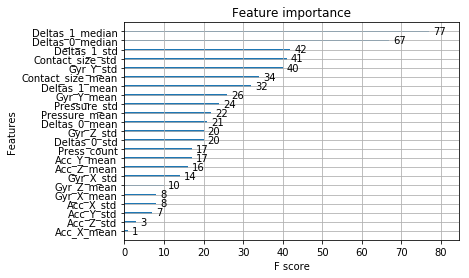

<Figure size 432x288 with 0 Axes>

In [187]:
xgb.plot_importance(clf)
plt.figure()

In [183]:
i_pred_proba = clf.predict_proba(x_test)
auc = roc_auc_score(y_test, i_pred_proba[:, 1])

In [184]:
print(auc)

0.9853976531942634


In [185]:
df_test.reset_index().SessionID.unique()

array(['Diego04', 'Jo1', 'Toto6', 'Toto8'], dtype=object)

In [186]:
df_train.reset_index().SessionID.unique()

array(['Andres1', 'Diego05', 'Toto1', 'Toto10', 'Toto2', 'Toto5', 'Toto7',
       'Toto9', 'jo2', 'jo3', 'jo4', 'jo5'], dtype=object)

In [204]:
clf.save_model("toto.model.bin")